# CMUBTG W05: Classification

![](https://gallery.mailchimp.com/2f77ab610640a97c09a7c2193/images/900c307a-ac15-4dd9-9f1b-4b758849ba2a.png)

Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_circles

In [3]:
# make linearly separable data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# make circle data
circles = make_circles(noise=0.2, factor=0.5)

ls_X, ls_y = linearly_separable
ls_X = StandardScaler().fit_transform(ls_X)  # standardization: z = (x - u) / s
ls_X_train, ls_X_test, ls_y_train, ls_y_test = train_test_split(ls_X, ls_y, test_size=0.2)  # train / test sets

c_X, c_y = circles
c_X = StandardScaler().fit_transform(c_X) # z = (x - u) / s
c_X_train, c_X_test, c_y_train, c_y_test = train_test_split(c_X, c_y, test_size=0.2)  # train / test sets

In [4]:
# set display size of plot
figure = plt.figure(figsize=(10, 5))

In [5]:
####################################
### Plot Linearly Separable Data ###
####################################

ax = plt.subplot(1, 2, 1)

# red and blue colors
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# plot the training points
ax.scatter(ls_X_train[:, 0],
           ls_X_train[:, 1],
           c=ls_y_train,
           cmap=cm_bright,
           edgecolors='k')

# plot the testing points
ax.scatter(ls_X_test[:, 0],
           ls_X_test[:, 1],
           c=ls_y_test,
           cmap=cm_bright,
           alpha=0.5,
           edgecolors='k')

# plot aesthetics
ax.set_title("Linearly Separable")
ax.set_xticks(())
ax.set_yticks(())

[]

In [6]:
########################
### Plot Circle Data ###
########################

ax = plt.subplot(1, 2, 2)

# red and blue colors
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# plot the training points
ax.scatter(c_X_train[:, 0],
           c_X_train[:, 1],
           c=c_y_train,
           cmap=cm_bright,
           edgecolors='k')

# plot the testing points
ax.scatter(c_X_test[:, 0],
           c_X_test[:, 1],
           c=c_y_test,
           cmap=cm_bright,
           alpha=0.5,
           edgecolors='k')

# plot aesthetics
ax.set_title("Circles")
ax.set_xticks(())
ax.set_yticks(())

[]

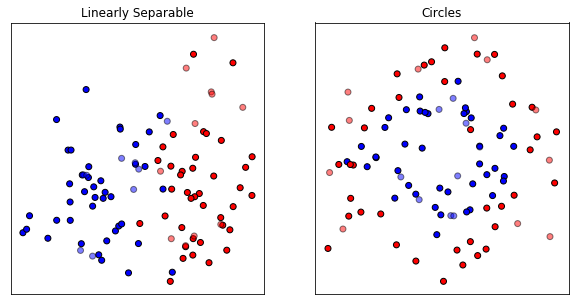

In [7]:
plt.show()

## Classifiers

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [25]:
names = ["Logistic Regression",
         "Linear SVM",
         "RBF SVM",
         "Decision Tree",
         "AdaBoost",
         "Neural Net"]

classifiers = [
    LogisticRegression(C=1e5, solver='lbfgs'),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1)
]

In [10]:
# use red blue color plot
cm = plt.cm.RdBu

C:\Users\calvi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


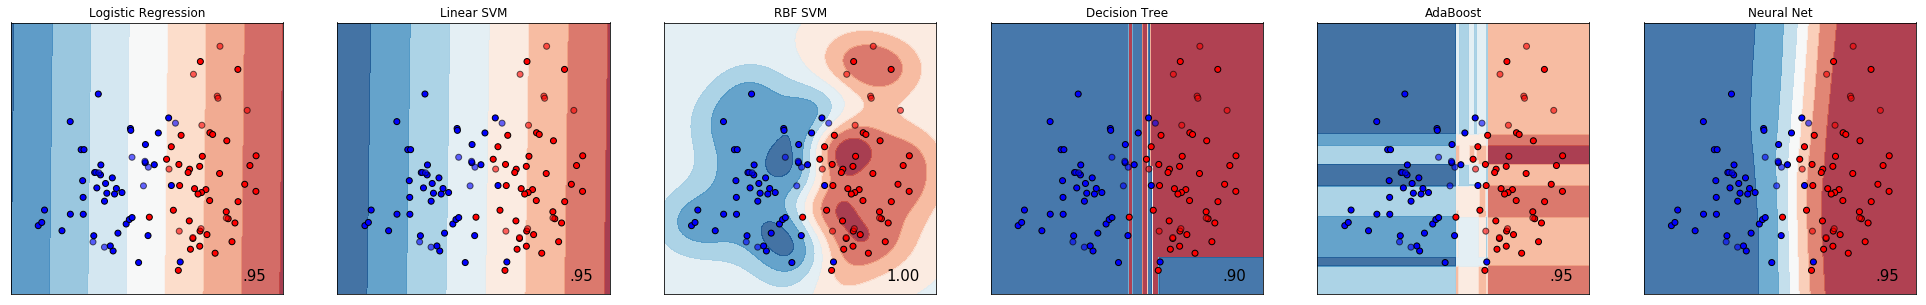

In [11]:
##############################################
### Classifiers on Linearly Separable Data ###
##############################################

# reset plot
figure = plt.figure(figsize=(40, 5))

# iterate over classifiers
i = 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    
    # fit the classifier
    clf.fit(ls_X_train, ls_y_train)
    score = clf.score(ls_X_test, ls_y_test)
    
    # create color plot, don't worry about this
    x_min, x_max = ls_X[:, 0].min() - .5, ls_X[:, 0].max() + .5
    y_min, y_max = ls_X[:, 1].min() - .5, ls_X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # plot the training points
    ax.scatter(ls_X_train[:, 0],
               ls_X_train[:, 1],
               c=ls_y_train,
               cmap=cm_bright,
               edgecolors='k')
    
    # plot the testing points
    ax.scatter(ls_X_test[:, 0],
               ls_X_test[:, 1],
               c=ls_y_test,
               cmap=cm_bright,
               edgecolors='k',
               alpha=0.5)

    # plot aesthetics
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    # plot title and score
    ax.set_title(name)
    ax.text(xx.max() - .3,
            yy.min() + .3,
            ('%.2f' % score).lstrip('0'),
            size=15,
            horizontalalignment='right')
    
    i += 1

plt.show()

C:\Users\calvi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


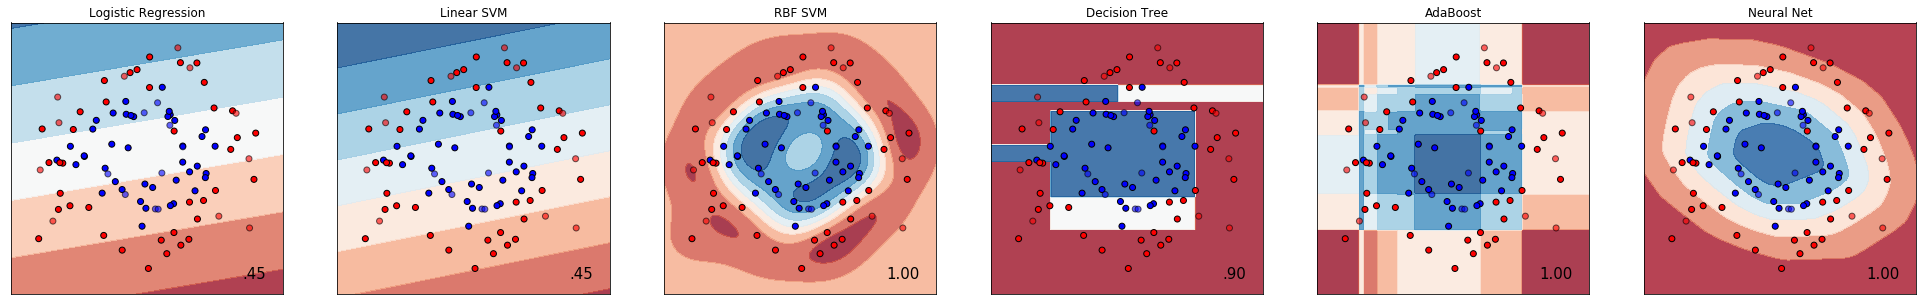

In [12]:
##################################
### Classifiers on Circle Data ###
##################################

# reset plot
figure = plt.figure(figsize=(40, 5))

# iterate over classifiers
i = 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    
    # fit the classifier
    clf.fit(c_X_train, c_y_train)
    score = clf.score(c_X_test, c_y_test)
    
    # create color plot, don't worry about this
    x_min, x_max = c_X[:, 0].min() - .5, c_X[:, 0].max() + .5
    y_min, y_max = c_X[:, 1].min() - .5, c_X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # plot the training points
    ax.scatter(c_X_train[:, 0],
               c_X_train[:, 1],
               c=c_y_train,
               cmap=cm_bright,
               edgecolors='k')
    
    # plot the testing points
    ax.scatter(c_X_test[:, 0],
               c_X_test[:, 1],
               c=c_y_test,
               cmap=cm_bright,
               edgecolors='k',
               alpha=0.6)

    # plot aesthetics
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    # plot title and score
    ax.set_title(name)
    ax.text(xx.max() - .3,
            yy.min() + .3,
            ('%.2f' % score).lstrip('0'),
            size=15,
            horizontalalignment='right')
    
    i += 1

plt.show()

## Real World Example

In [17]:
# Importing http://archive.ics.uci.edu/ml/datasets/Abalone

# Sex / nominal / -- / M, F, and I (infant) 
# Length / continuous / mm / Longest shell measurement 
# Diameter	/ continuous / mm / perpendicular to length 
# Height / continuous / mm / with meat in shell 
# Whole weight / continuous / grams / whole abalone 
# Shucked weight / continuous	/ grams / weight of meat 
# Viscera weight / continuous / grams / gut weight (after bleeding) 
# Shell weight / continuous / grams / after being dried 
# Rings / integer / -- / +1.5 gives the age in years 

# defining column names 
app_cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

# reading in specific columns of csv file 
col_numbers = [0,1,2,3,4,5,6,7,8]
pre_attr = pd.read_csv('abalone.data', dtype=object, usecols=col_numbers, 
                     encoding='latin-1', header=None, names=app_cols)

# display first 5 rows
print(len(pre_attr), "rows")
print(len(pre_attr.columns), "columns")
pre_attr.head(5)

4177 rows
9 columns


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [18]:
# # Code columns into boolean value
def make_bool(x):
    if(x == 'M'): return 0
    elif(x == 'F'): return 1
    else: return 2

pre_attr['Sex'] = pre_attr['Sex'].apply( lambda x: make_bool(x))
    
pre_attr.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,B_Sex
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,0
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7,0
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9,1
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10,0
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7,2
5,I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8,2
6,F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20,1
7,F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16,1
8,M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9,0
9,F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19,1


In [19]:
attr = pre_attr.copy(deep=True)

In [28]:
#get training and testing rows
train_events = attr[:2089]
test_events = attr[2089:]
X = [[row['Length'], row['Diameter'], row['Height'],row['Whole weight'],row['Shucked weight'],row['Viscera weight'],
      row['Shell weight']] for index, row in train_events.iterrows()]
y = train_events['Rings']

X_test = [[row['Length'], row['Diameter'], row['Height'],row['Whole weight'],row['Shucked weight'],row['Viscera weight'],
      row['Shell weight']] for index, row in test_events.iterrows()]
y_test = test_events['Rings']

print(y_test[:10])

#convert series to lists
y_train = y.tolist()
y_test = y_test.tolist()
#convert lists to numpy arrays
y_train_np = np.array(y)
X_train_np = np.array(X, dtype = 'float32')
y_test_np = np.array(y_test)
X_test_np = np.array(X_test, dtype = 'float32')
print(X_train_np)
print(X_test_np)

2089    10
2090    17
2091     8
2092    10
2093    11
2094     7
2095     7
2096    11
2097     7
2098     8
Name: Rings, dtype: object
[[0.455  0.365  0.095  ... 0.2245 0.101  0.15  ]
 [0.35   0.265  0.09   ... 0.0995 0.0485 0.07  ]
 [0.53   0.42   0.135  ... 0.2565 0.1415 0.21  ]
 ...
 [0.71   0.5    0.15   ... 0.6835 0.2815 0.28  ]
 [0.72   0.585  0.22   ... 0.9155 0.448  0.479 ]
 [0.72   0.575  0.215  ... 0.8565 0.4825 0.602 ]]
[[0.73   0.555  0.18   ... 0.6555 0.1965 0.4935]
 [0.775  0.57   0.22   ... 0.735  0.4755 0.6585]
 [0.505  0.39   0.115  ... 0.3045 0.1555 0.175 ]
 ...
 [0.6    0.475  0.205  ... 0.5255 0.2875 0.308 ]
 [0.625  0.485  0.15   ... 0.531  0.261  0.296 ]
 [0.71   0.555  0.195  ... 0.9455 0.3765 0.495 ]]


In [29]:
#fit and test model
from sklearn.metrics import accuracy_score 

for i in range(len(classifiers)):
    model = classifiers[i]
    model.fit(X_train_np, y_train_np)
    pred = model.predict(X_test_np)
    print(names[i], accuracy_score(y_test_np, pred))

Logistic Regression 0.2629310344827586
Linear SVM 0.20545977011494254
RBF SVM 0.25526819923371646
Decision Tree 0.26053639846743293
AdaBoost 0.20689655172413793
Neural Net 0.23467432950191572
